In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

data = pd.read_csv('/Users/lofang/Desktop/python/csv files/loan_data.csv')

In [2]:
data.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [3]:
cat_feats = ['purpose']
x = pd.get_dummies(data,columns=cat_feats,drop_first=True)
x.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data2=data.copy()
data2['purpose']=le.fit_transform(data['purpose'])
data2

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,2,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,4,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


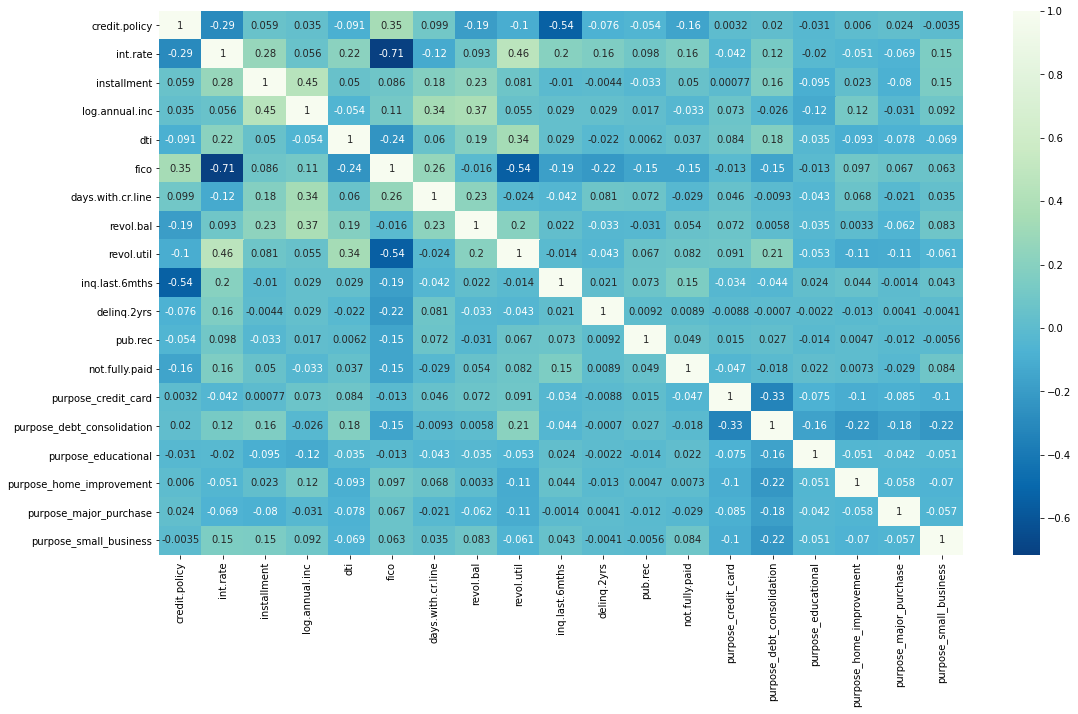

In [5]:

plt.figure(figsize = (18, 10))
sns.heatmap(x.corr(), annot= True,cmap='GnBu_r')
plt.show()

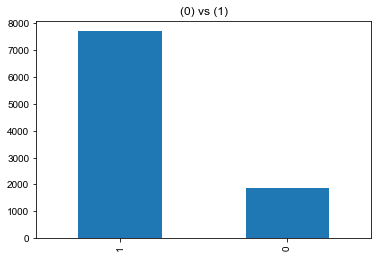

In [6]:
data['credit.policy'].value_counts().plot(kind='bar')
sns.set_style('whitegrid')
sns.set_palette('bwr')
plt.title('(0) vs (1)')
plt.show()

In [7]:
x=x.drop(['credit.policy'], axis=1)
y=data['credit.policy']
# print(X.head())
print(x.shape)
# print(y.head())
print(y.shape)


(9578, 18)
(9578,)


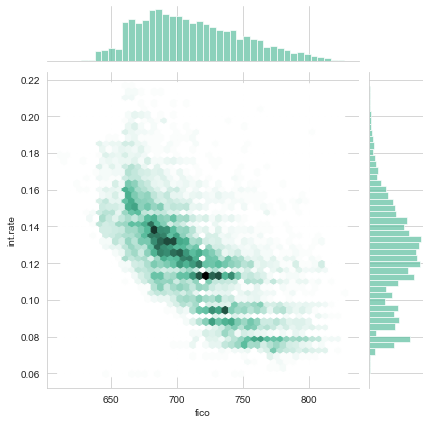

In [8]:
sns.set_palette('Set2')
sns.jointplot(data=data, x='fico', y='int.rate', kind='hex')
plt.show()

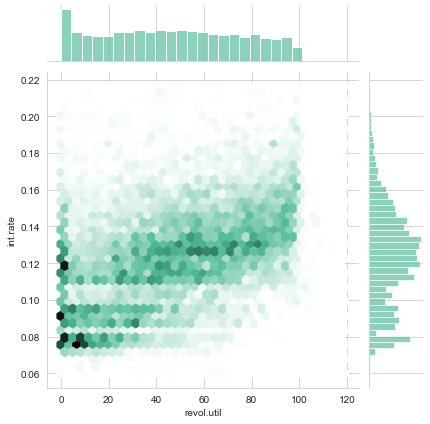

In [9]:
sns.jointplot(data=data, x='revol.util', y='int.rate', kind='hex')
plt.show()

In [10]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
x_resampled, y_resampled = rus.fit_resample(x, y)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size = 0.25,stratify=y_resampled,random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2802, 18)
(2802,)
(934, 18)
(934,)


In [12]:
print(y_train.value_counts())
print(y_test.value_counts())

0    1401
1    1401
Name: credit.policy, dtype: int64
0    467
1    467
Name: credit.policy, dtype: int64


In [13]:
credit_model=RandomForestClassifier(random_state=1)
credit_model.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

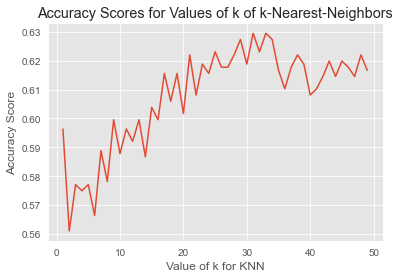

In [14]:
k_range = list(range(1,50))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(knn.score(x_test, y_test))
plt.style.use('ggplot')
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [15]:
print("Making predictions for the following 10 loans:")
print(data['credit.policy'].head(10))
print("The predictions are")
print(credit_model.predict(x.head(10)))

Making predictions for the following 10 loans:
0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: credit.policy, dtype: int64
The predictions are
[1 1 1 1 1 1 1 1 1 1]


In [16]:
predicted_credit=credit_model.predict(x)

In [17]:
credit_model.score(x_test,y_test)

0.9710920770877944

In [18]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y, predicted_credit)
print(cf_matrix)

[[1851   17]
 [ 103 7607]]


<AxesSubplot:>

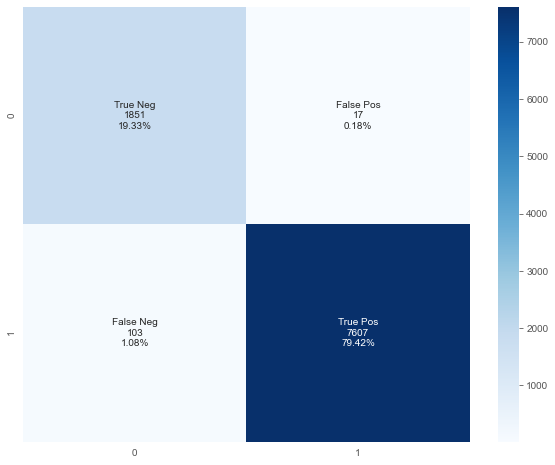

In [19]:
plt.figure(figsize=(10,8))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]#不留小數
group_percentages = ["{0:0.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]#保留小數後兩位
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]#換行
labels = np.asarray(labels).reshape(2,2)#建構成2維
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')#annot：將label數據寫入單元格中

In [20]:
from sklearn import feature_selection as fs
from sklearn import datasets

In [21]:
# Removing features with low variance
# 設定變異數門檻值，剔除變異過低的特徵
# $$Var(X)=E[(X-\mu)^2]$$
# Bernoulli distribution: $$ Var(X)=p(1-P)$$
X=[[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
sel=fs.VarianceThreshold(threshold=0.8*(1-0.8))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

In [22]:
# Univariate feature selection
# 透過單獨計算每個特徵的統計值來決定重要特徵
# 1. SelectKBest: 選取排名前K個重要特徵
# 2. SelectPercentile: 選取排名前K%的重要特徵
# For regression:
# f_regression, mutual_info_regression
# For classification:¶
# chi2, f_classif, mutual_info_classif
iris=datasets.load_iris()
X=iris.data
y=iris.target
X.shape

(150, 4)

In [27]:
#For classification:chi2, f_classif, mutual_info_classif
X_new=fs.SelectKBest(fs.chi2,k=3).fit_transform(X,y)

In [28]:
X_new.shape

(150, 3)

In [29]:
X_new=fs.SelectPercentile(fs.mutual_info_classif,percentile=50).fit_transform(X,y)
X_new.shape

(150, 2)

In [30]:
#PCA analysis
from sklearn.decomposition import PCA
from sklearn import datasets
import pandas as pd
import numpy as np

In [37]:
iris=datasets.load_iris()
X=iris.data
y=iris.target

In [40]:
pca=PCA(n_components=2)#dimentions
pca.fit(X).transform(X)
pca

PCA(n_components=2)

In [41]:
from sklearn.ensemble import BaggingClassifier
from sklearn import datasets
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
iris=datasets.load_iris()
X=iris.data
y=iris.target
x_1=pd.DataFrame(X)
x_1.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)
len(X_test)

45

In [44]:
clf=GaussianNB()
bagging=BaggingClassifier(base_estimator=clf,n_estimators=100,bootstrap=True,bootstrap_features=True,max_features=3,max_samples=0.7)
# max_features: 4 features extract 3 of them
bagging.fit(X_train,y_train)


BaggingClassifier(base_estimator=GaussianNB(), bootstrap_features=True,
                  max_features=3, max_samples=0.7, n_estimators=100)

In [45]:
bagging.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

In [46]:
print("training set score: ",bagging.score(X_train,y_train))
print("testing set score: ",bagging.score(X_test,y_test))

training set score:  0.9428571428571428
testing set score:  0.9777777777777777


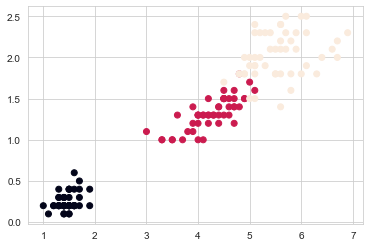

In [47]:
plt.scatter(X[:,2],X[:,3],c=y)#X[:,2]取第一維度中所有值，第二維度中的第2值

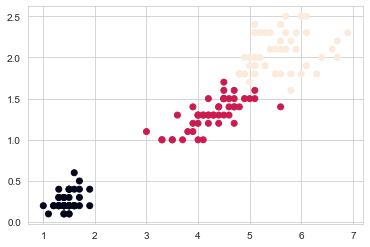

In [48]:
plt.scatter(X[:,2],X[:,3],c=bagging.predict(X))

In [49]:
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [50]:
gb.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [51]:
gb.score(X_test,y_test)

0.9777777777777777

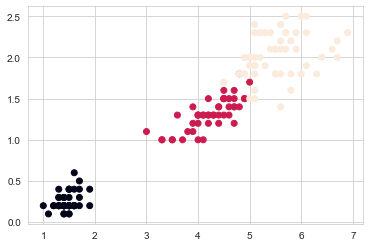

In [52]:
plt.scatter(X[:,2],X[:,3],c=gb.predict(X))

In [53]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
data=pd.read_csv('/Users/lofang/Desktop/python/csv files/HeartDiseaseTrain-Test.csv')


In [54]:
data.head(10)

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0
5,58,Female,Typical angina,100,248,Lower than 120 mg/ml,Normal,122,No,1.0,Flat,Zero,Fixed Defect,1
6,58,Male,Typical angina,114,318,Lower than 120 mg/ml,Left ventricular hypertrophy,140,No,4.4,Upsloping,Three,Normal,0
7,55,Male,Typical angina,160,289,Lower than 120 mg/ml,Normal,145,Yes,0.8,Flat,One,Reversable Defect,0
8,46,Male,Typical angina,120,249,Lower than 120 mg/ml,Normal,144,No,0.8,Downsloping,Zero,Reversable Defect,0
9,54,Male,Typical angina,122,286,Lower than 120 mg/ml,Normal,116,Yes,3.2,Flat,Two,Fixed Defect,0


In [55]:
cat_feats = ['sex','chest_pain_type','fasting_blood_sugar','rest_ecg','exercise_induced_angina','slope','vessels_colored_by_flourosopy','thalassemia']
x = pd.get_dummies(data,columns=cat_feats,drop_first=True)
x.head()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target,sex_Male,chest_pain_type_Atypical angina,chest_pain_type_Non-anginal pain,chest_pain_type_Typical angina,...,exercise_induced_angina_Yes,slope_Flat,slope_Upsloping,vessels_colored_by_flourosopy_One,vessels_colored_by_flourosopy_Three,vessels_colored_by_flourosopy_Two,vessels_colored_by_flourosopy_Zero,thalassemia_No,thalassemia_Normal,thalassemia_Reversable Defect
0,52,125,212,168,1.0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1,53,140,203,155,3.1,0,1,0,0,1,...,1,0,1,0,0,0,1,0,0,1
2,70,145,174,125,2.6,0,1,0,0,1,...,1,0,1,0,0,0,1,0,0,1
3,61,148,203,161,0.0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,62,138,294,106,1.9,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0


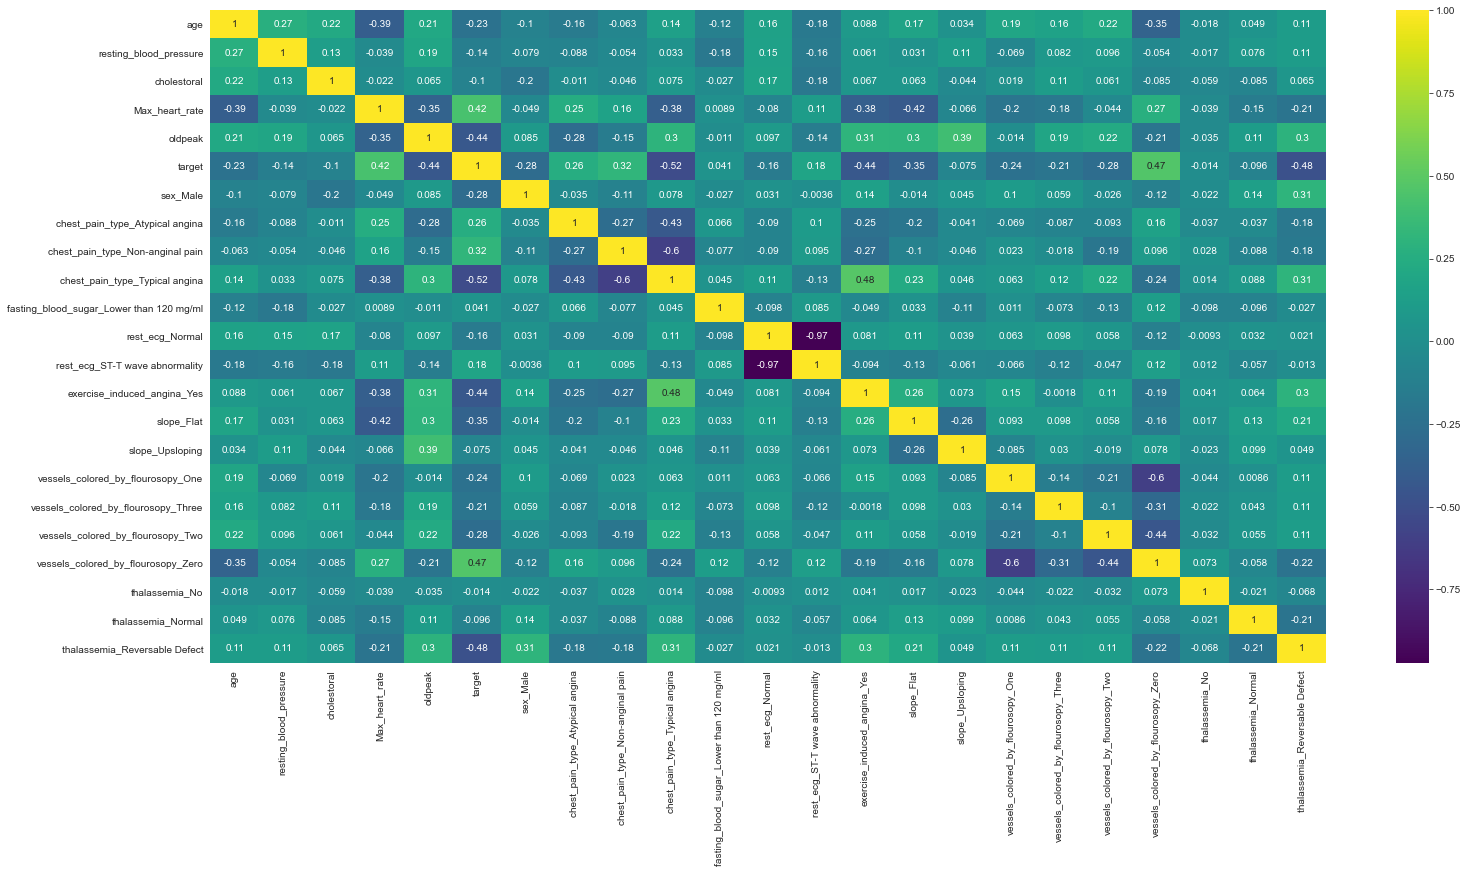

In [56]:
plt.figure(figsize = (25, 12))
sns.heatmap(x.corr(), annot= True,cmap='viridis')
plt.show()

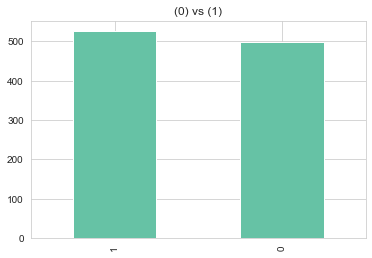

In [57]:
data['target'].value_counts().plot(kind='bar')
sns.set_style('whitegrid')
sns.set_palette('bwr')
plt.title('(0) vs (1)')
plt.show()

In [58]:
x=x.drop(['target'], axis=1)
y=data['target']
# print(X.head())
print(x.shape)
# print(y.head())
print(y.shape)

(1025, 22)
(1025,)


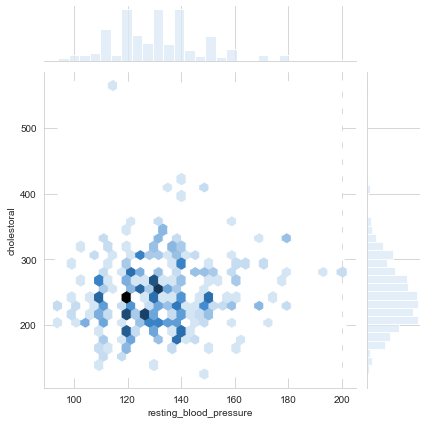

In [60]:
sns.set_palette('Blues')
sns.jointplot(data=data, x='resting_blood_pressure', y='cholestoral', kind='hex')
plt.show()

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,stratify=y,random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(768, 22)
(768,)
(257, 22)
(257,)


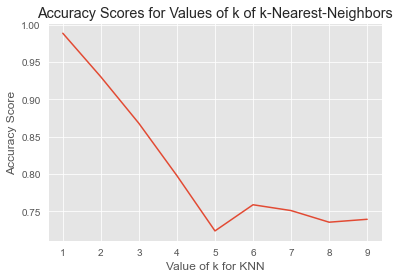

In [62]:
k_range = list(range(1,10))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(knn.score(x_test, y_test))
plt.style.use('ggplot')
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [63]:
disease_model=KNeighborsClassifier(n_neighbors=1)
disease_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [64]:
print("Making predictions for the following 10 cases:")
print(data['target'].head(10))
print("The predictions are")
print(disease_model.predict(x.head(10)))

Making predictions for the following 10 cases:
0    0
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    0
9    0
Name: target, dtype: int64
The predictions are
[0 0 0 0 0 1 0 0 0 0]


In [65]:
print("training scores",disease_model.score(x_train,y_train))
print("test scores",disease_model.score(x_test,y_test))

training scores 1.0
test scores 0.9883268482490273


In [66]:
bagging=BaggingClassifier(base_estimator=disease_model,n_estimators=100,bootstrap=True,bootstrap_features=True,max_features=15,max_samples=0.7)
bagging.fit(x_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=1),
                  bootstrap_features=True, max_features=15, max_samples=0.7,
                  n_estimators=100)

In [67]:
bagging.score(x_test,y_test)

0.9883268482490273

In [68]:
predicted_cases=bagging.predict(x)
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y, predicted_cases)
print(cf_matrix)

[[496   3]
 [  0 526]]


<AxesSubplot:>

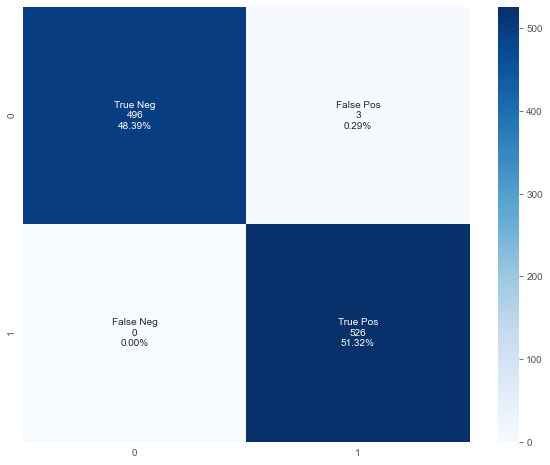

In [69]:
plt.figure(figsize=(10,8))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]#不留小數
group_percentages = ["{0:0.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]#保留小數後兩位
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]#換行
labels = np.asarray(labels).reshape(2,2)#建構成2維
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')#annot：將label數據寫入單元格中